In [23]:
import pandas as pd
import os 

ruta = os.path.abspath('./Datasets')

In [24]:
df_clientes = pd.read_csv(ruta+'/Clientes.csv', sep=';', encoding='utf-8', index_col=False)
df_compra = pd.read_csv(ruta + '/Compra.csv', sep=',', encoding='utf-8')
df_gasto = pd.read_csv(ruta + '/Gasto.csv', sep=',', encoding='utf-8')
df_localidades = pd.read_csv(ruta + '/Localidades.csv', sep=',', encoding='utf-8')
df_proveedores = pd.read_csv(ruta + '/Proveedores.csv', sep=',', encoding='latin-1')
df_sucursales = pd.read_csv(ruta + '/Sucursales.csv', sep=';', encoding='utf-8')
df_venta = pd.read_csv(ruta + '/Venta.csv', sep=',')

## Análisis

In [327]:
import matplotlib.pyplot as plt

In [26]:
#retornando los valores nulos por columna
def valor_nulo(e):
    diccionario = {}
    for column in e.columns:
        val_nul = e[column].isna().sum()
        diccionario[column] = int(val_nul)

    return diccionario    

In [27]:
#retornando los valores atipicos por columna
def outlier(e):
    diccionario ={}
    for column in e.columns:
        if e[column].dtype != 'object':
            Q1 = e[column].describe()['25%']
            Q3 = e[column].describe()['75%']

            IQR = Q3 -Q1
            minimo = Q1 - 1.5 * IQR
            maximo = Q3 + 1.5 * IQR

            upper =[e[column][i] for i in range(e.shape[0]) if e[column][i] >= maximo] 
            lower =[e[column][i] for i in range(e.shape[0]) if e[column][i] <= minimo] 
            outl = lower + upper
            diccionario[column] = len(outl) 
    return diccionario

In [338]:
#tranformando el dataframe
def graficar_transformar(e):   
    new =e.transpose()
    new = new.rename(columns={0:'Valor'})

    porcentaje = [round((new.Valor[i] / new.Valor.sum()) * 100,2) for i in range(new.shape[0])]
    new['Porcentaje'] = porcentaje
    graph = plt.bar(new.index,new.Porcentaje, color=['red','green','orange'])
    plt.ylabel("Porcentaje")

    i = 0
    for p in graph:
        width = p.get_width()
        x, y = p.get_xy()
        plt.text(x+width/2,
                 p.get_height() + 1,
                 str(new.Porcentaje[i])+'%',
                 ha='center')
        i+=1
    plt.ylim(0,max(new.Porcentaje) * 1.1 )
    return new

### tabla cliente

In [34]:
clientes_outlier = outlier(df_clientes)
clientes_valor_nulo = valor_nulo(df_clientes)

In [35]:
print(clientes_outlier)
print(clientes_valor_nulo)

{}
{'ID,Provincia,Nombre_y_Apellido,Domicilio,Telefono,Edad,Localidad,X,Y,col10,,,': 0}


### tabla compra

In [31]:
compra_outlier = outlier(df_compra)
compra_valor_nulo = valor_nulo(df_compra)

In [33]:
print(compra_outlier)
print(compra_valor_nulo)

{'IdCompra': 0, 'Fecha_Año': 0, 'Fecha_Mes': 0, 'Fecha_Periodo': 0, 'IdProducto': 0, 'Cantidad': 406, 'Precio': 599, 'IdProveedor': 0}
{'IdCompra': 0, 'Fecha': 0, 'Fecha_Año': 0, 'Fecha_Mes': 0, 'Fecha_Periodo': 0, 'IdProducto': 0, 'Cantidad': 0, 'Precio': 367, 'IdProveedor': 0}


In [343]:
vo = [[key, compra_outlier[key]] for key in compra_outlier.keys() if compra_outlier[key] > 0]
vnan = [[key, compra_valor_nulo[key]] for key in compra_valor_nulo.keys() if compra_valor_nulo[key] > 0]
print(vo)
print(vnan)

[['Cantidad', 406], ['Precio', 599]]
[['Precio', 367]]


,Valor,Porcentaje
Outlier,406,0.88
Sin errores,45774,99.12


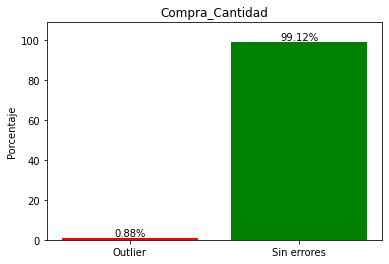

In [344]:
compra_cantidad = pd.DataFrame()
compra_cantidad['Outlier'] =   [vo[0][1]]
compra_cantidad['Sin errores'] = [df_venta.shape[0] - vo[0][1]]
plt.title('Compra_Cantidad')
graficar_transformar(compra_cantidad)

,Valor,Porcentaje
Outlier,599,1.30
Valor Nulo,367,0.79
Sin errores,45214,97.91


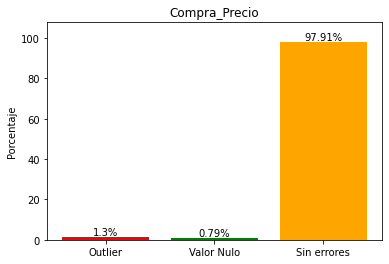

In [345]:
compra_precio = pd.DataFrame()
compra_precio['Outlier'] =   [vo[1][1]]
compra_precio['Valor Nulo'] = [vnan[0][1]]
compra_precio['Sin errores'] = [df_venta.shape[0] - vo[1][1] - vnan[0][1]]
plt.title('Compra_Precio')
graficar_transformar(compra_precio)

### tabla gasto

In [346]:
gasto_outlier = outlier(df_gasto)
gasto_valor_nulo = valor_nulo(df_gasto)

In [347]:
print(gasto_outlier)
print(gasto_valor_nulo)

{'IdGasto': 0, 'IdSucursal': 0, 'IdTipoGasto': 0, 'Monto': 0}
{'IdGasto': 0, 'IdSucursal': 0, 'IdTipoGasto': 0, 'Fecha': 0, 'Monto': 0}


### tabla localidades

In [38]:
localidades_outlier = outlier(df_localidades)
localidades_valor_nulo = valor_nulo(df_localidades)

In [39]:
print(localidades_outlier)
print(localidades_valor_nulo)

{'centroide_lat': 70, 'centroide_lon': 0, 'departamento_id': 0, 'id': 0, 'localidad_censal_id': 0, 'municipio_id': 0, 'provincia_id': 0}
{'categoria': 0, 'centroide_lat': 0, 'centroide_lon': 0, 'departamento_id': 1, 'departamento_nombre': 1, 'fuente': 0, 'id': 0, 'localidad_censal_id': 0, 'localidad_censal_nombre': 0, 'municipio_id': 543, 'municipio_nombre': 494, 'nombre': 0, 'provincia_id': 0, 'provincia_nombre': 0}


In [349]:
vo = [[key, localidades_outlier[key]] for key in localidades_outlier.keys() if localidades_outlier[key] > 0]
vnan = [[key, localidades_valor_nulo[key]] for key in localidades_valor_nulo.keys() if localidades_valor_nulo[key] > 0]
print(vo)
print(vnan)

[['centroide_lat', 70]]
[['departamento_id', 1], ['departamento_nombre', 1], ['municipio_id', 543], ['municipio_nombre', 494]]


### tabla proveedores

In [40]:
proveedores_outlier = outlier(df_proveedores)
proveedores_valor_nulo = valor_nulo(df_proveedores)

In [41]:
print(proveedores_outlier)
print(proveedores_valor_nulo)

{'IDProveedor': 0}
{'IDProveedor': 0, 'Nombre': 2, 'Address': 0, 'City': 0, 'State': 0, 'Country': 0, 'departamen': 0}


### tabla sucursales

In [42]:
sucursales_outlier = outlier(df_sucursales)
sucursales_valor_nulo = valor_nulo(df_sucursales)

In [43]:
print(sucursales_outlier)
print(sucursales_valor_nulo)

{'ID': 0}
{'ID': 0, 'Sucursal': 0, 'Direccion': 0, 'Localidad': 0, 'Provincia': 0, 'Latitud': 0, 'Longitud': 0}


### tabla venta

In [44]:
venta_outlier = outlier(df_venta)
venta_valor_nulo = valor_nulo(df_venta)

In [313]:
print(venta_outlier)
print(venta_valor_nulo)

{'IdVenta': 0, 'IdCanal': 0, 'IdCliente': 0, 'IdSucursal': 0, 'IdEmpleado': 0, 'IdProducto': 0, 'Precio': 2476, 'Cantidad': 910}
{'IdVenta': 0, 'Fecha': 0, 'Fecha_Entrega': 0, 'IdCanal': 0, 'IdCliente': 0, 'IdSucursal': 0, 'IdEmpleado': 0, 'IdProducto': 0, 'Precio': 920, 'Cantidad': 884}


In [339]:
vo = [[key, venta_outlier[key]] for key in venta_outlier.keys() if venta_outlier[key] > 0]
vnan = [[key, venta_valor_nulo[key]] for key in venta_valor_nulo.keys() if venta_valor_nulo[key] > 0]
print(vo)
print(vnan)

[['Precio', 2476], ['Cantidad', 910]]
[['Precio', 920], ['Cantidad', 884]]


,Valor,Porcentaje
Outlier,910,1.97
Valor Nulo,884,1.91
Sin errores,44386,96.12


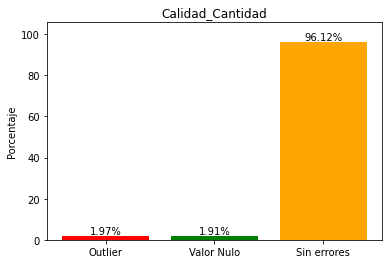

In [341]:
calidad_cantidad = pd.DataFrame()
calidad_cantidad['Outlier'] =   [vo[1][1]]
calidad_cantidad['Valor Nulo'] = [vnan[1][1]]
calidad_cantidad['Sin errores'] = [df_venta.shape[0] - vo[1][1] - vnan[1][1]]
plt.title('Calidad_Cantidad')
graficar_transformar(calidad_cantidad)

,Valor,Porcentaje
Outlier,2476,5.36
Valor Nulo,920,1.99
Sin errores,42784,92.65


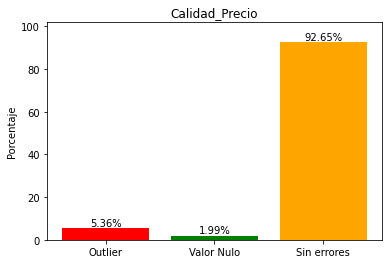

In [342]:
calidad_precio = pd.DataFrame()
calidad_precio['Outlier'] =   [vo[0][1]]
calidad_precio['Valor Nulo'] = [vnan[0][1]]
calidad_precio['Sin errores'] = [df_venta.shape[0] - vo[0][1] - vnan[0][1]]
plt.title('Calidad_Precio')
graficar_transformar(calidad_precio)